In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("daily-min-temperatures.csv", parse_dates=["Date"])
temps = df["Temp"].values.reshape(-1, 1)

In [5]:
scaler = MinMaxScaler()
temps_scaled = scaler.fit_transform(temps)

In [6]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

In [7]:
window_size = 7
X, y = create_sequences(temps_scaled, window_size)

In [8]:
X_fnn = X.reshape(X.shape[0], X.shape[1])

In [9]:
model_fnn = Sequential([
    Dense(64, activation='relu', input_shape=(window_size,)),
    Dense(32, activation='relu'),
    Dense(1)
])

c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model_fnn.compile(optimizer='adam', loss='mse')
model_fnn.fit(X_fnn, y, epochs=20, batch_size=32)

Epoch 1/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0281
Epoch 2/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0096
Epoch 3/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089
Epoch 4/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089
Epoch 5/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0087
Epoch 6/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087
Epoch 7/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087
Epoch 8/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087
Epoch 9/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086
Epoch 10/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0087
Epoch 11/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0086
Epoch 12/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0086
Epoch 13/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0085
Epoch 14/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0085
Epoch 15/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

In [11]:
model_rnn = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])

c:\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model_rnn.compile(optimizer='adam', loss='mse')
model_rnn.fit(X, y, epochs=20, batch_size=32)

Epoch 1/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0198
Epoch 2/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0109
Epoch 3/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0095
Epoch 4/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0090
Epoch 5/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0094
Epoch 6/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0091
Epoch 7/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0088
Epoch 8/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088
Epoch 9/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091
Epoch 10/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088
Epoch 11/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089
Epoch 12/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0088
Epoch 13/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089
Epoch 14/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089
Epoch 15/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

In [13]:
y_pred_fnn = scaler.inverse_transform(model_fnn.predict(X_fnn))
y_pred_rnn = scaler.inverse_transform(model_rnn.predict(X))
y_true = scaler.inverse_transform(y)

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


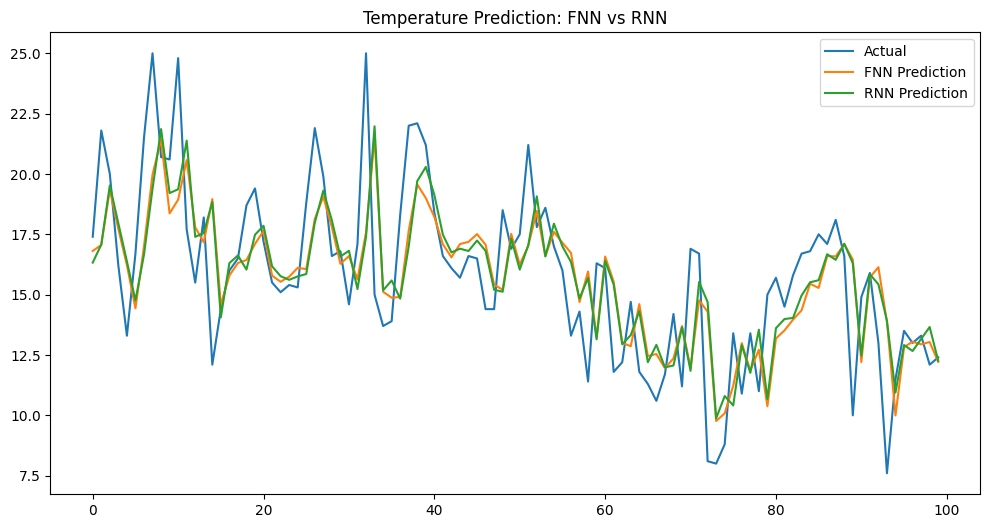

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(y_true[:100], label="Actual")
plt.plot(y_pred_fnn[:100], label="FNN Prediction")
plt.plot(y_pred_rnn[:100], label="RNN Prediction")
plt.legend()
plt.title("Temperature Prediction: FNN vs RNN")
plt.show()